Reduced MNIST Tutorial : train a small network

THALES DMS France, 2019, Atelier ALLOHA du 15/01/2019

Import lib

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

/home/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Database

In [2]:
# load mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reduce dataset size
n_train, img_height, img_width = x_train.shape
n_train = 400
x_train.shape
x_train = x_train[:n_train,:,:]
y_train = y_train[:n_train]
n_test = 800
x_test = x_test[:n_test,:,:]
y_test = y_test[:n_test]

num_classes = np.max(y_train)+1
y_train_class = to_categorical(y_train,num_classes=num_classes)
y_test_class = to_categorical(y_test,num_classes=num_classes)

x_train.shape, x_test.shape

((400, 28, 28), (800, 28, 28))

Images dimensions

In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_width,img_height)
    x_test = x_test.reshape(x_test.shape[0],1,img_width,img_height)
    input_shape = (1, img_width, img_height)
else:
    x_train = x_train.reshape(x_train.shape[0],img_width,img_height,1)
    x_test = x_test.reshape(x_test.shape[0],img_width,img_height,1)
    input_shape = (img_width, img_height,1)

Training parameters

In [4]:
epochs = 150
batch_size = 32

CNN architecture

In [5]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 16)          4624      
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 16)          0         
__________

Compiler

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Data

In [7]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.025,
    height_shift_range=0.025,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train,
    y_train_class,
    batch_size=batch_size)

validation_generator = test_datagen.flow(
    x_test,
    y_test_class,
    batch_size=batch_size)

Training

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=n_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=n_test // batch_size)

Epoch 1/150
12/12 [==============================] - 0s 35ms/step - loss: 13.5416 - acc: 0.1328 - val_loss: 13.5211 - val_acc: 0.1163
Epoch 2/150
12/12 [==============================] - 0s 13ms/step - loss: 13.5869 - acc: 0.1200 - val_loss: 11.7018 - val_acc: 0.2200
Epoch 3/150
12/12 [==============================] - 0s 13ms/step - loss: 13.6629 - acc: 0.1304 - val_loss: 11.7711 - val_acc: 0.2050
Epoch 4/150
12/12 [==============================] - 0s 13ms/step - loss: 13.4825 - acc: 0.1437 - val_loss: 11.7880 - val_acc: 0.2263
Epoch 5/150
12/12 [==============================] - 0s 12ms/step - loss: 13.3175 - acc: 0.1566 - val_loss: 12.7698 - val_acc: 0.1925
Epoch 6/150
12/12 [==============================] - 0s 12ms/step - loss: 12.9961 - acc: 0.1720 - val_loss: 11.7854 - val_acc: 0.2562
Epoch 7/150
12/12 [==============================] - 0s 12ms/step - loss: 13.1385 - acc: 0.1696 - val_loss: 12.5015 - val_acc: 0.2150
Epoch 8/150
12/12 [==============================] - 0s 12ms/s

12/12 [==============================] - 0s 14ms/step - loss: 0.2801 - acc: 0.9033 - val_loss: 0.2831 - val_acc: 0.9325
Epoch 124/150
12/12 [==============================] - 0s 14ms/step - loss: 0.3329 - acc: 0.9270 - val_loss: 0.3083 - val_acc: 0.9225
Epoch 125/150
12/12 [==============================] - 0s 13ms/step - loss: 0.2422 - acc: 0.9297 - val_loss: 0.2810 - val_acc: 0.9313
Epoch 126/150
12/12 [==============================] - 0s 14ms/step - loss: 0.2841 - acc: 0.9220 - val_loss: 0.3910 - val_acc: 0.9225
Epoch 127/150
12/12 [==============================] - 0s 14ms/step - loss: 0.3572 - acc: 0.8907 - val_loss: 0.2715 - val_acc: 0.9287
Epoch 128/150
12/12 [==============================] - 0s 14ms/step - loss: 0.2124 - acc: 0.9244 - val_loss: 0.2785 - val_acc: 0.9375
Epoch 129/150
12/12 [==============================] - 0s 13ms/step - loss: 0.3275 - acc: 0.9168 - val_loss: 0.2871 - val_acc: 0.9200
Epoch 130/150
12/12 [==============================] - 0s 14ms/step - loss: 

Plot

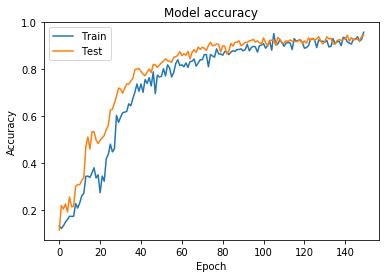

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

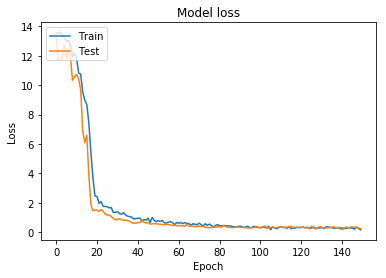

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Save model

In [11]:
model.save_weights('smallnet.h5')